<a href="https://colab.research.google.com/github/KChittaranjan/airbnb-data-analysis/blob/main/AirBnB_Capstone_Project_Chittaranjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
pip install geopandas

In [166]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [97]:
file_path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Capstone Project/Airbnb NYC 2019.csv'

df = pd.read_csv(file_path)

Let us observe different columns and their types

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [99]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


This is quite a large data set having wide range of features... we'll first see if columns are having appropriate data types 

The only column with inopropriate data type is last_review and availability_365 remaining all are fine

In [100]:
#parsing the last review from object to date
df['last_review'] = pd.to_datetime(df['last_review'])
df['availability_365'] = pd.to_timedelta(df['availability_365'])

In [101]:
#number of null values in each column
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Columns with null values are name , host_name , last_review and reviews_per_month 
In these we'll use **name** to do analysis as it describes the room and contains valueble info about room , **host_name** we don't need at all as it doesn't add any relevance to the analysis , and next **last_review** and **reviews_per_month** have large number of null values we'll check the reason as to why.

In [102]:
#dropping rows with no name
df = df[~df['name'].isna()]
#dropping the entire column of host_name as it is insignificant
df.drop('host_name',axis=1 , inplace=True)

In [103]:
#observing data with last_review as null
df[df['last_review'].isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,0 days 00:00:00.000000365
19,7750,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,0 days 00:00:00.000000249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0 days 00:00:00
36,11452,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,0 days 00:00:00.000000365
38,11943,Country space in the city,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,0 days 00:00:00.000000365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,0 days 00:00:00.000000009
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,0 days 00:00:00.000000036
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,0 days 00:00:00.000000027
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,0 days 00:00:00.000000002


We can see in the data that last_month and number_of_reviews are na when number_of_reviews are 0 , so it makes sence we just need to assign them appropriate values
1)**number_of_reviews** we'll assign this to 0 as total number of reviews  are 0
2)**last_reviews** we'll assign NA to this as we wo'nt be using this column for most of the analysis except for the analysis that are based on the availability of listing or if it is active now same goes with **availability_365** we'll use this to answer questions on how busy a host is ,when we are doing those analysis we'll remove rows with null values as those contains large chunk of rows and it doesn't make sense to remove them when we don't need these features



In [104]:
df['reviews_per_month'].fillna(0,inplace=True)
df['last_review'].fillna('NA',inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   id                              48879 non-null  int64          
 1   name                            48879 non-null  object         
 2   host_id                         48879 non-null  int64          
 3   neighbourhood_group             48879 non-null  object         
 4   neighbourhood                   48879 non-null  object         
 5   latitude                        48879 non-null  float64        
 6   longitude                       48879 non-null  float64        
 7   room_type                       48879 non-null  object         
 8   price                           48879 non-null  int64          
 9   minimum_nights                  48879 non-null  int64          
 10  number_of_reviews               48879 non-null  int64     

We can proceed as there are no null values now


# Data types
We'll devide the data into the types 


1.   Categorical - id , name , host_id , neighbourhood_group , neighbourhood , room_type 
2.   Numerical - price , minimum_nights , number_of_reviews , reviews_per_month,calculated_host_listings_count,availability_365, latitude , longitude 



We'll explore numerical data types first as they might contain outliers

count    48879.000000
mean       152.722355
std        240.186804
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


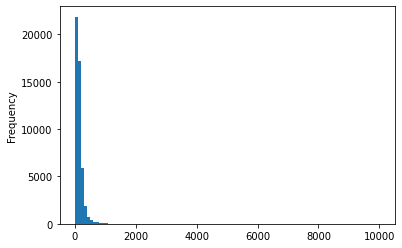

In [107]:
print(df['price'].describe())
df['price'].plot.hist(bins=100)

As we can see from graph and describe most of the price is below 1000 so we'll only consider that

In [50]:
df = df[df['price'] < 1000]

#

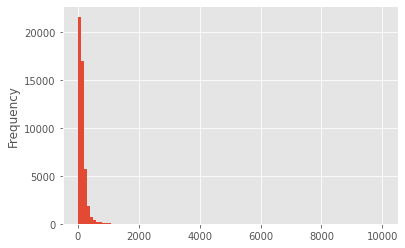

In [168]:
#distribution of new values of new values
df['price'].plot.hist(bins=100)

There are still some outliers but we'll consider them as to allow for how expensive rents can be in new york

count    48879.000000
mean         7.011027
std         20.016000
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


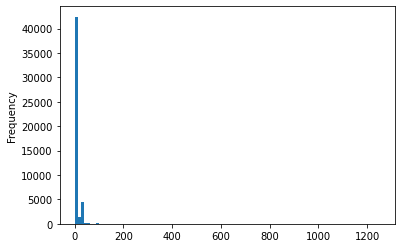

In [110]:
print(df['minimum_nights'].describe())
df['minimum_nights'].plot.hist(bins=100)

We can see that most of the data is less than 10 but there is peak somewhere around 50 

In [111]:
#extreme outliers
df['minimum_nights'].quantile(0.98)

30.0

We'll consider listings below this as this is 1 month which some hosts prefer 

In [112]:
df = df[df['minimum_nights'] <= 30]

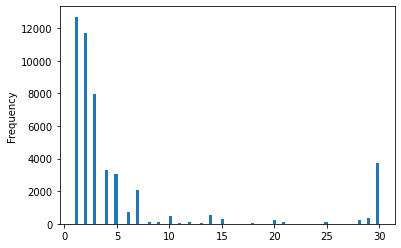

In [113]:
df['minimum_nights'].plot.hist(bins=100)

Yes this is as we speculated most of the values are skewed to 0 and there are some at 30

In [ ]:
#hypothesis
#city price ---chittaranjan
#neighbourhood and price ---nurul
#room type and price---nurul
#price and number of reviews-- nurul
#minimum_nights and number_of_reviews --- chittaranjan
#host id reviews per month .....how busy a host is why....spread of price location , room type --- bhanu
#based on map  --- bhanu
#last_review to see the closed listings ---nirola
#text ----nirola

Now let us see categorical columns

Let us create segregate our data into unique values of each of the category one by one


1.  neighbourhood
2.  type_of_room
3.  neighbourhood_groups
4.  host_id





In [114]:
#storing unique values of categorical columns to do analysis
neighbourhoods = list(df['neighbourhood'].unique())
neighbourhood_groups = list(df['neighbourhood_group'].unique())
type_of_rooms = list(df['room_type'].unique())
hosts = list(df['host_id'].unique())

In [152]:
def get_neighbourhood(row):
  return list(set(list(df.loc[df['neighbourhood_group'] == row,'neighbourhood'])))

In [153]:
neighbourhood_df = (df.groupby('neighbourhood_group')['id'].count().reset_index().sort_values('id',ascending=False).rename(columns={'id':'number_of_listings'}))
neighbourhood_df['percentage'] = neighbourhood_df['number_of_listings'].apply(lambda row: round(row*100/df['id'].count(),2))
neighbourhood_df['number_of_reviews'] = (df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index())['number_of_reviews']
neighbourhood_df['reviews_per_month'] = (df.groupby('neighbourhood_group')['reviews_per_month'].sum().reset_index())['reviews_per_month']
neighbourhood_df['average_rice'] = (df.groupby('neighbourhood_group')['price'].mean().reset_index())['price']
neighbourhood_df['standard_deviation'] = (df.groupby('neighbourhood_group')['price'].std().reset_index())['price']
neighbourhood_df['neighbourhoods'] = neighbourhood_df['neighbourhood_group'].apply(get_neighbourhood)

In [154]:
neighbourhood_df

,neighbourhood_group,number_of_listings,percentage,number_of_reviews,reviews_per_month,average_rice,standard_deviation,neighbourhoods
2,Manhattan,21231,44.11,450280,21014.95,195.559088,278.282770,"[Marble Hill, Greenwich Village, East Harlem, ..."
1,Brooklyn,19845,41.23,483443,21026.87,123.572739,180.728686,"[Williamsburg, Sheepshead Bay, Carroll Gardens..."
3,Queens,5611,11.66,156343,8868.15,97.249866,95.600140,"[South Ozone Park, Corona, Briarwood, Ridgewoo..."
0,Bronx,1077,2.24,28319,1608.07,87.683380,107.337597,"[Mott Haven, Concourse, Parkchester, Van Nest,..."
4,Staten Island,369,0.77,11540,586.99,115.352304,279.066068,"[Bull's Head, Arden Heights, Todt Hill, Howlan..."


In [167]:
street_map = gpd.read_file('/content/drive/MyDrive/Boundaries/Borough Boundaries.zip (Unzipped Files)/geo_export_dbd0e1ff-776d-4f46-9c1f-42844dbaa345.shp')
goemetry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])]


geo_df = geopandas.GeoDataFrame(df,geometry = goemetry)

fig,ax = plt.subplots(figsize = (15,10))

street_map.plot(ax = ax ,alpha = 0.4 )
geo_df.plot(column='price',ax = ax , alpha = 0.4 , legend = True , marketsize = 10)
plt.title('Rental Prices in NYC')
plt.xlim(-74.02,-73.925)
plt.ylim(40.7,40.8)

NameError: ignored

Text(0.5, 0, 'Neighbourhood`')

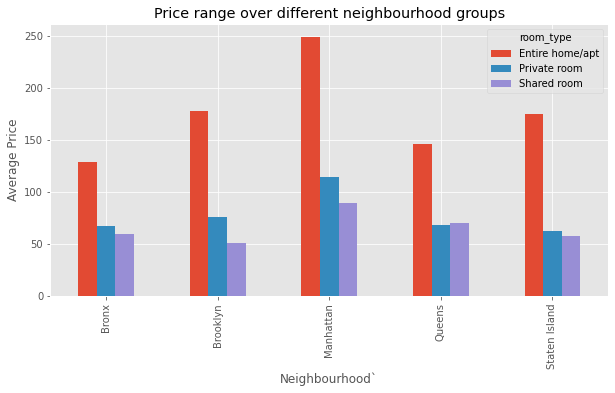

In [151]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind="bar")
plt.title('Price range over different neighbourhood groups')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood`')

Text(0.5, 1.0, 'Percentage of listings accross New York neighbourhoods')

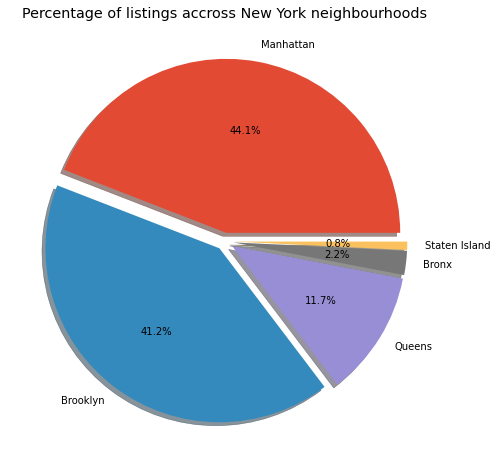

In [150]:
#matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = (8,8)

#plotting
plt.pie(neighbourhood_df['percentage'], labels=neighbourhood_df['neighbourhood_group'],  explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True)

#labeling
plt.title('Percentage of listings accross New York neighbourhoods')

From above two figures we can see that maximum number of listings are there
in Manhattan and brooklyn and it isn't coincident these two have the appropriate distribution of room types

**BELOW COLUMNS WERE DONE 1 DAY BEFORE WHEN I DIDN'T KNOW DATA CLEANING WELL I KEPT THEM BECAUSE MOST OF THE ANALYSIS I HAVE DONE JUST NEED TO TWEAK THEM A LILLTE WHICH I WILL DO TOMORROW THIS IS AS FAR AS I COULD REDO**

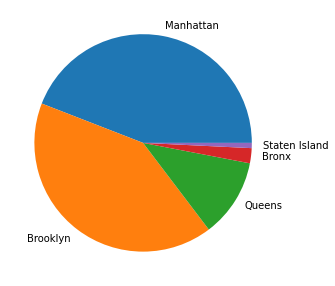

In [132]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.pie(neighbourhood_df['percentage'], labels = neighbourhood_df['neighbourhood_group'])
plt.show() 

count    48879.000000
mean        23.281205
std         44.556149
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


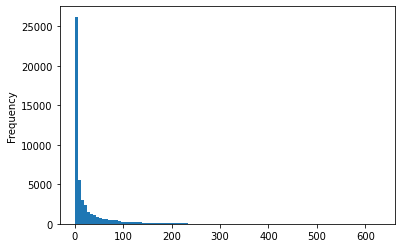

In [109]:
print(df['number_of_reviews'].describe())
df['number_of_reviews'].plot.hist(bins=100)

In [93]:
df[df['minimum_nights'] > 1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09 00:00:00,0.03,1,365


In [94]:
df[df['id']==4204302]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09 00:00:00,0.03,1,365


So no these are not aggregated and we will remove the extreme outliers

In [95]:
df[(df['minimum_nights'] > df['minimum_nights'].quantile(0.95))]['minimum_nights'].min()

31

Coincidentally they became the listings which requires the guest to stay atleast for one month

In [96]:
df = df[df['minimum_nights'] <= 31]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48254 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48254 non-null  int64         
 1   name                            48239 non-null  object        
 2   host_id                         48254 non-null  int64         
 3   host_name                       48233 non-null  object        
 4   neighbourhood_group             48254 non-null  object        
 5   neighbourhood                   48254 non-null  object        
 6   latitude                        48254 non-null  float64       
 7   longitude                       48254 non-null  float64       
 8   room_type                       48254 non-null  object        
 9   price                           48254 non-null  int64         
 10  minimum_nights                  48254 non-null  int64         
 11  nu

Now we'll check if the listing is available in a year or not

In [97]:
available_df = df.loc[df['availability_365'] == 0,['availability_365','number_of_reviews','last_review']]

In [26]:
available_df

,availability_365,number_of_reviews,last_review
4,0,9,2018-11-19
8,0,118,2017-07-21
20,0,9,2011-12-28
26,0,0,2011-03-28
48,0,11,2017-01-01
...,...,...,...
48550,0,0,2011-03-28
48731,0,0,2011-03-28
48756,0,0,2011-03-28
48760,0,0,2011-03-28


We'll check the difference between the latest date a perticular review has been added and that of the listing and see if it really is 0

In [102]:
latest_date = df.loc[df['last_review'] != 'NA','last_review'].max()

In [104]:
available_df.loc[available_df['last_review']!='NA','inactive_for'] = available_df.loc[available_df['last_review']!='NA','last_review'].apply(lambda row: (latest_date - row))

In [105]:
available_df['diff_year'] = available_df['inactive_for']/ np.timedelta64(1, 'Y')

In [106]:
available_df = available_df[(available_df['diff_year'] >= 1)&(available_df['number_of_reviews'] != 0)]

We can remove the above columns as these really have been inactive for more than year

In [107]:
df2 = df.copy()

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48254 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48254 non-null  int64  
 1   name                            48239 non-null  object 
 2   host_id                         48254 non-null  int64  
 3   host_name                       48233 non-null  object 
 4   neighbourhood_group             48254 non-null  object 
 5   neighbourhood                   48254 non-null  object 
 6   latitude                        48254 non-null  float64
 7   longitude                       48254 non-null  float64
 8   room_type                       48254 non-null  object 
 9   price                           48254 non-null  int64  
 10  minimum_nights                  48254 non-null  int64  
 11  number_of_reviews               48254 non-null  int64  
 12  last_review                     

In [109]:
df2 = df2.drop(index=available_df.index.to_list())

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40568 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              40568 non-null  int64  
 1   name                            40556 non-null  object 
 2   host_id                         40568 non-null  int64  
 3   host_name                       40552 non-null  object 
 4   neighbourhood_group             40568 non-null  object 
 5   neighbourhood                   40568 non-null  object 
 6   latitude                        40568 non-null  float64
 7   longitude                       40568 non-null  float64
 8   room_type                       40568 non-null  object 
 9   price                           40568 non-null  int64  
 10  minimum_nights                  40568 non-null  int64  
 11  number_of_reviews               40568 non-null  int64  
 12  last_review                     

In [111]:
df2[(df2['availability_365']==0) & (df2['number_of_reviews']!=0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22 00:00:00,1.57,1,0
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20 00:00:00,1.86,1,0
165,41348,* Spacious GARDEN Park Slope Duplex* 6 people max,180083,Syl,Brooklyn,Gowanus,40.66858,-73.99083,Entire home/apt,250,2,80,2019-07-06 00:00:00,2.17,1,0
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20 00:00:00,1.06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46532,35292625,Room-cabin in Hell's kitchen,137191484,Maria,Manhattan,Hell's Kitchen,40.76479,-73.98667,Private room,86,1,1,2019-06-05 00:00:00,0.88,5,0
46583,35329913,Charming Brooklyn Garden apt - historic Macdon...,46724430,Mariana,Brooklyn,Bedford-Stuyvesant,40.68364,-73.92307,Entire home/apt,125,3,1,2019-07-01 00:00:00,1.00,1,0
47175,35615687,Duplex Apartment 3 bedroom 2 bath (6 guest),145082728,Jason & Kelly,Brooklyn,Bedford-Stuyvesant,40.68091,-73.95006,Entire home/apt,350,2,1,2019-06-30 00:00:00,1.00,2,0
47218,35642891,Beautiful room in Bushwick,268138154,Julio,Brooklyn,Bushwick,40.69640,-73.91898,Private room,10,1,2,2019-06-18 00:00:00,2.00,1,0


We'll update these values with the number of days = 365 - (latest date - last review date) as these are inconsistent

In [112]:
df2[df2['availability_365']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NA,0.00,1,0
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22 00:00:00,1.57,1,0
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20 00:00:00,1.86,1,0
165,41348,* Spacious GARDEN Park Slope Duplex* 6 people max,180083,Syl,Brooklyn,Gowanus,40.66858,-73.99083,Entire home/apt,250,2,80,2019-07-06 00:00:00,2.17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NA,0.00,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NA,0.00,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NA,0.00,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NA,0.00,1,0


In [113]:
df2.loc[(df2['availability_365']==0) & (df2['number_of_reviews']!=0),'availability_365'] = df2.loc[(df2['availability_365']==0) & (df2['number_of_reviews']!=0),'last_review'].apply(lambda row: timedelta(days = 365) -(latest_date - row))

In [71]:
len(df2[df2['availability_365']==0])

4785

In [114]:
df2[(df2['number_of_reviews']==0) & (df2['availability_365']!=0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,0.0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NA,0.0,2,249
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NA,0.0,1,365
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NA,0.0,1,365
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NA,0.0,7,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NA,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NA,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NA,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NA,0.0,6,2


Now on these values we dont have any way of knowing if these are really been inactive for a year as these do not have reviews and do not have availability  we'll drop these 

In [119]:
remove = df2.loc[(df2['availability_365']==0) & (df2['number_of_reviews']==0)].index.to_list()

In [120]:
df3 = df2.copy()

In [122]:
df3.drop(index=remove)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,134 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NA,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NA,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NA,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NA,0.00,6,2


In [ ]:
Now rows with 0 price

In [124]:
df3[df3['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06 00:00:00,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24 00:00:00,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18 00:00:00,0.71,5,314 days 00:00:00
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02 00:00:00,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15 00:00:00,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21 00:00:00,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23 00:00:00,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NA,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22 00:00:00,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24 00:00:00,0.26,6,139


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

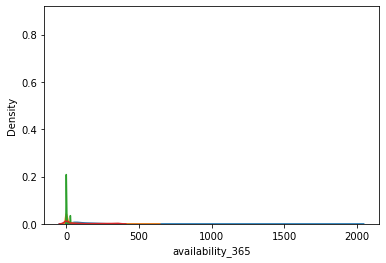

In [ ]:
sns.distplot(df['price'], hist=True,bins=100)
sns.distplot(df['number_of_reviews'], hist=True,bins=100)
sns.distplot(df['minimum_nights'], hist=True,bins=100)
sns.distplot(df['availability_365'], hist=True,bins=100)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [ ]:
#correcting the prices with 0 values to median values
#update the price values based on categorical (subgroup)
df.loc[df['price'] == 0,'price'] = df.loc[df['price'] != 0,'price'].median()

In [ ]:
df.loc[df['price'] == 0,'price']

Series([], Name: price, dtype: int64)

In [ ]:
neighbourhood_group_df = df.groupby('neighbourhood_group')['price'].mean().reset_index()

In [ ]:
neighbourhood_group_df['number_of_reviews'] = (df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index())['number_of_reviews']

In [ ]:
neighbourhood_group_df['number_of_listings'] = (df.groupby('neighbourhood_group')['id'].count().reset_index())['id']

In [ ]:
neighbourhood_group_df['standard_deviation'] = (df.groupby('neighbourhood_group')['price'].std().reset_index())['price']

In [ ]:
neighbourhood_group_df['last_review'] = (df.groupby('neighbourhood_group')['last_review'].max().reset_index())['last_review']

In [ ]:
neighbourhood_group_df['number_of_hosts'] = (df.groupby('neighbourhood_group')['host_id'].count().reset_index())['host_id']

In [ ]:
neighbourhood_group_df.drop('number_of_hosts',axis = 1)

,neighbourhood_group,price,number_of_reviews,number_of_listings,standard_deviation,last_review
0,Bronx,89.130197,26582,914,112.617584,2019-07-07
1,Brooklyn,132.916313,425357,12260,188.984983,2019-07-08
2,Manhattan,214.202080,392267,13559,325.029426,2019-07-08
3,Queens,100.029781,143883,4298,108.584467,2019-07-08
4,Staten Island,114.229607,10865,331,291.526508,2019-07-08


Text(0.5, 0, 'Neighbourhood`')

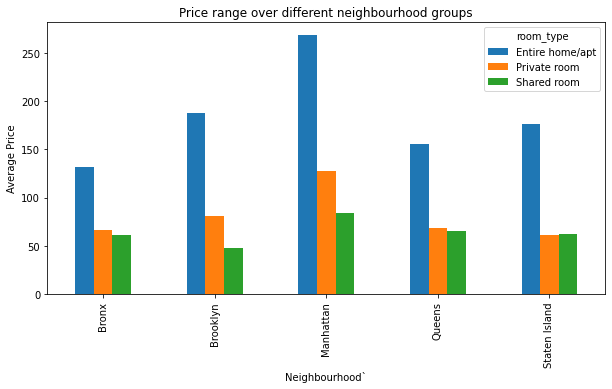

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind="bar")
plt.title('Price range over different neighbourhood groups')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood`')

In [ ]:
host_df = df.groupby('host_id')['id'].count().reset_index().sort_values('id',ascending = False)

In [ ]:
host_df

,host_id,id
19267,219517861,327
15504,107434423,232
10412,30283594,121
7164,12243051,96
16600,137358866,92
...,...,...
7897,16030422,1
7895,16024560,1
7894,16015663,1
7893,16006197,1


In [ ]:
def get_neighbourhood(row):
  li = []
  for area in df.loc[row == df['host_id'],'neighbourhood_group']:
    li.append(area)
  return list(set(li))

In [ ]:
host_df['neighbourhood'] = host_df['host_id'].apply(lambda row: get_neighbourhood(row))

In [ ]:
host_df['avg_number_of_days'] = host_df['host_id'].apply(lambda row: df.loc[df['host_id']==row,'availability_365'].mean())

In [ ]:
host_df

,host_id,id,neighbourhood,avg_number_of_days
19267,219517861,327,[Manhattan],301.492355
15504,107434423,232,"[Manhattan, Brooklyn]",253.810345
10412,30283594,121,[Manhattan],313.421488
7164,12243051,96,[Manhattan],276.614583
16600,137358866,92,"[Manhattan, Brooklyn, Queens]",219.967391
...,...,...,...,...
7897,16030422,1,[Manhattan],18.000000
7895,16024560,1,[Brooklyn],165.000000
7894,16015663,1,[Queens],88.000000
7893,16006197,1,[Brooklyn],86.000000


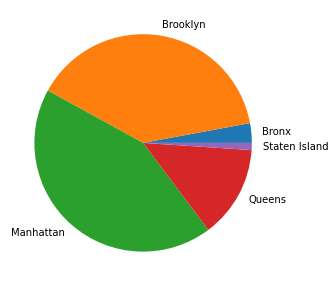

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.pie(neighbourhood_group_df['number_of_listings'], labels = neighbourhood_group_df['neighbourhood_group'])
plt.show() 

neighbourhood_group
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

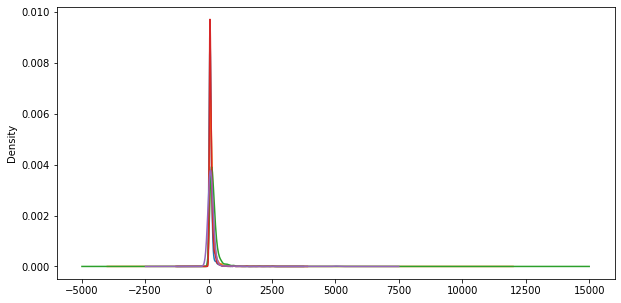

In [ ]:
df.groupby('neighbourhood_group').price.plot(kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


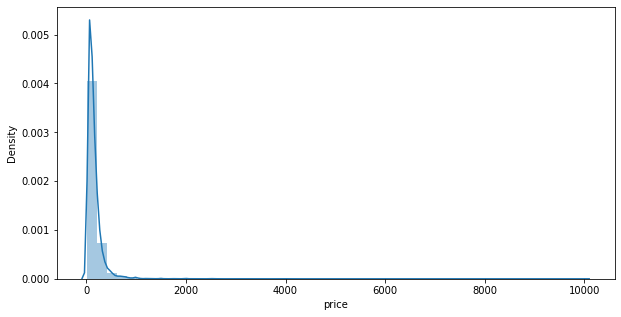

In [ ]:
sns.distplot(df['price'], hist=True)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)


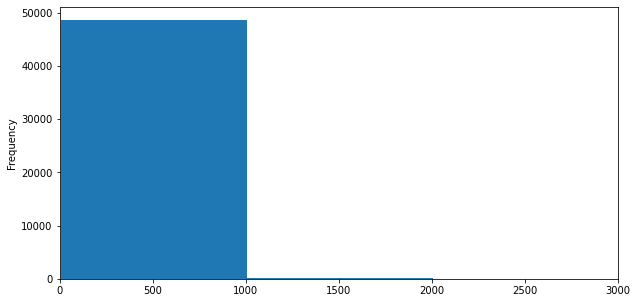

In [ ]:
df['price'].plot.hist(xlim=(0,3000)) 


([<matplotlib.axis.XTick at 0x7ff7819af0d0>,
 <a list of 20 Text major ticklabel objects>)

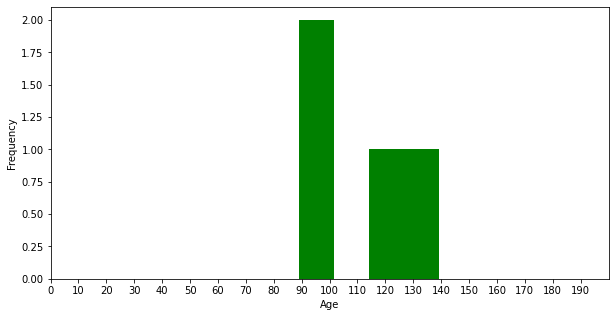

In [ ]:
plt.hist(neighbourhood_group_df['price'], color='green')
plt.xlim(0,200)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.xticks(np.arange(0, 200, 10))

In [ ]:
corr1 = neighbourhood_group_df['number_of_listings'].corr(neighbourhood_group_df['standard_deviation'],method='pearson')
print(corr1)

0.3793623754913061


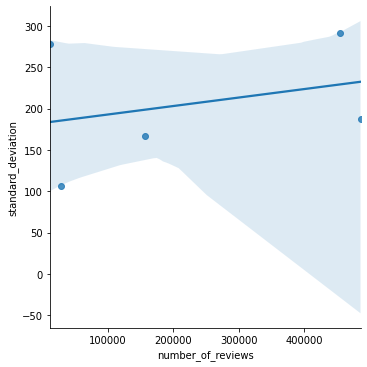

In [ ]:
sns.lmplot(x='number_of_reviews', y='standard_deviation', data= neighbourhood_group_df )

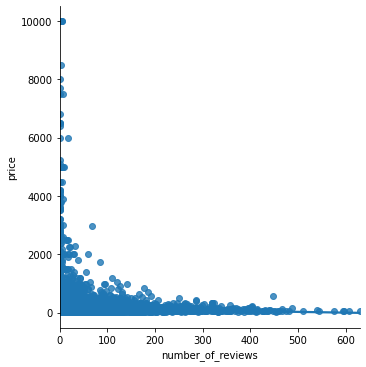

In [ ]:
sns.lmplot(x='number_of_reviews', y='price', data= df )

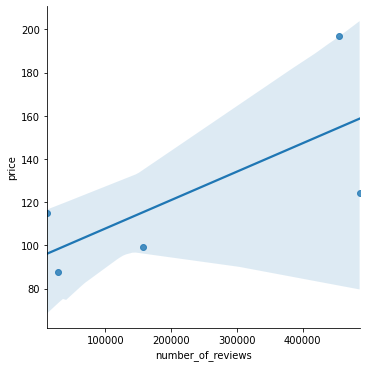

In [ ]:
sns.lmplot(x='number_of_reviews', y='price', data= neighbourhood_group_df )

In [ ]:
correlation_price_reviews = df.loc[:,['price','number_of_reviews']]

In [ ]:
correlation_price_reviews.corr()

,price,number_of_reviews
price,1.000000,-0.047932
number_of_reviews,-0.047932,1.000000


In [ ]:
neighbourhood_df = df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [ ]:
neighbourhood_df['number_of_listings'] = (df.groupby(['neighbourhood_group','neighbourhood'])['id'].count().reset_index())['id']

In [ ]:
neighbourhood_df['number_of_reviews'] = (df.groupby(['neighbourhood_group','neighbourhood'])['number_of_reviews'].sum().reset_index())['number_of_reviews']

In [ ]:
neighbourhood_df['standard_deviation'] = (df.groupby(['neighbourhood_group','neighbourhood'])['price'].std().reset_index())['price']

In [ ]:
neighbourhood_df

,neighbourhood_group,neighbourhood,price,number_of_listings,number_of_reviews,standard_deviation
0,Bronx,Allerton,91.702703,37,1752,76.842142
1,Bronx,Baychester,78.000000,6,310,17.561321
2,Bronx,Belmont,85.823529,17,275,77.808447
3,Bronx,Bronxdale,54.923077,13,318,18.481800
4,Bronx,Castle Hill,63.000000,9,118,33.462666
...,...,...,...,...,...,...
213,Staten Island,Tompkinsville,77.567568,37,2197,46.831578
214,Staten Island,Tottenville,144.857143,7,139,98.311458
215,Staten Island,West Brighton,80.555556,18,656,47.689217
216,Staten Island,Westerleigh,71.500000,2,18,44.547727


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


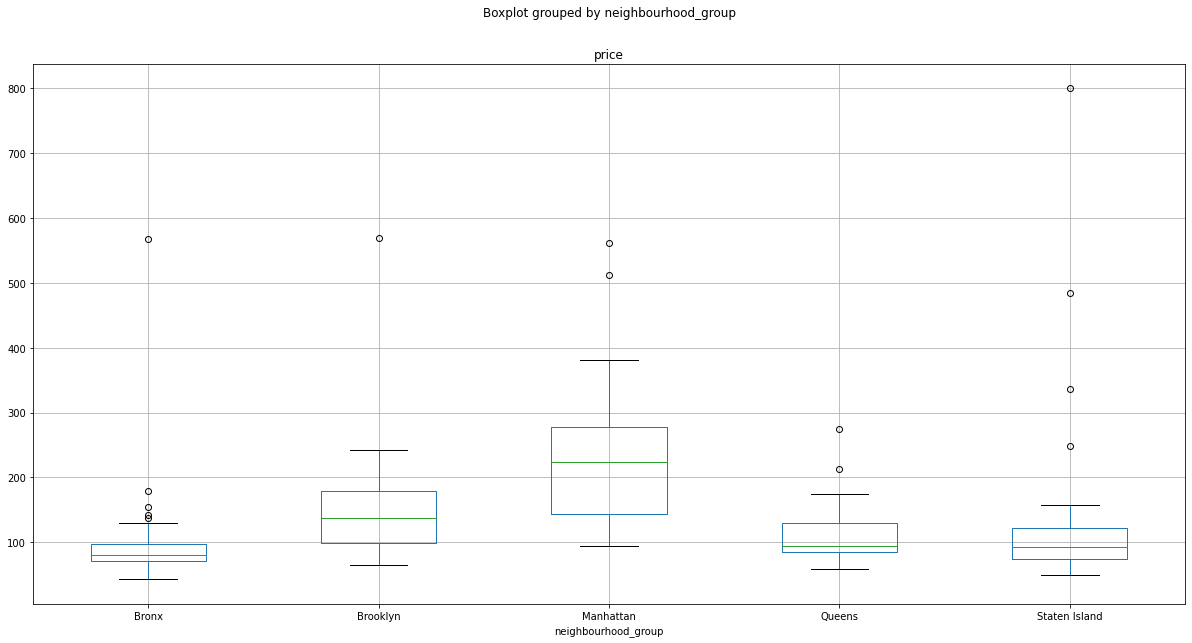

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
neighbourhood_df.boxplot(by = 'neighbourhood_group' , column='price')

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
plt.plot()


In [ ]:
plt.plot()

plt.title('Monthly Sales in the year 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Month')

In [ ]:
room_type_df = df.groupby('room_type')['price'].mean()

In [ ]:
room_type_df

room_type
Entire home/apt    211.802590
Private room        89.814208
Shared room         70.310345
Name: price, dtype: float64

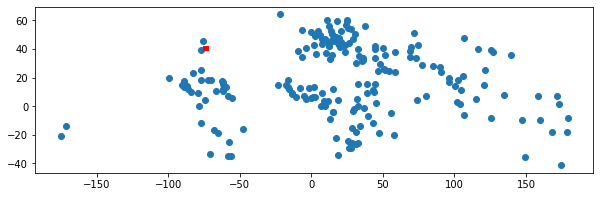

In [ ]:


geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);